<a href="https://colab.research.google.com/github/ZackAkil/stateful-object-tracking/blob/main/notebooks/Stateful_object_tracking_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!wget https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/training_data/dummy%20data/labeling_circles/bounding_box_coordinates.csv

--2023-06-25 13:48:33--  https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/training_data/dummy%20data/labeling_circles/bounding_box_coordinates.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9314 (9.1K) [text/plain]
Saving to: ‘bounding_box_coordinates.csv’

bounding_box_coordi 100%[===================>]   9.10K  --.-KB/s    in 0s      

2023-06-25 13:48:33 (103 MB/s) - ‘bounding_box_coordinates.csv’ saved [9314/9314]



In [6]:
import csv

# Path to the CSV file
csv_path = 'bounding_box_coordinates.csv'

# Open the CSV file
with open(csv_path, 'r') as file:
    # Create a CSV reader
    reader = csv.reader(file)

    # Initialize an empty list to store the data
    data = []

    # Read and process each row
    for row in reader:
        # Convert row values to numbers and append to the data list
        row_numbers = [float(value) for value in row]
        data.append(row_numbers)

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

def convert_coordinates(min_x, max_x, min_y, max_y):
    x_min = min_x
    y_min = min_y
    width = max_x - min_x
    height = max_y - min_y
    return x_min, y_min, width, height

def display_image_with_bounding_boxes(image_filename, bounding_boxes):
    # Load the image
    image = Image.open(image_filename)

    display_Image_matrix_with_boxes(image, bounding_boxes)


def display_bounding_boxes(bounding_boxes):
    # Load the image
    image = np.ones([800,800,3])

    display_Image_matrix_with_boxes(image, bounding_boxes)


def display_Image_matrix_with_boxes(image, bounding_boxes):

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Add bounding boxes to the plot
    for bbox in bounding_boxes:
        print(bbox)
        x_min, y_min, width, height = convert_coordinates(*bbox)
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    # Show the plot
    plt.show()

[525.0, 575.0, 128.0, 178.0]
[723.0, 773.0, 320.0, 370.0]


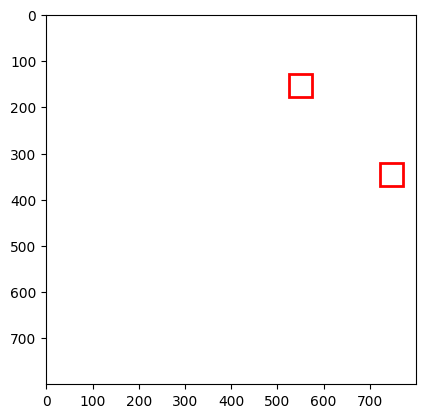

In [8]:
FRAME_N = 100
bounding_boxes = [data[FRAME_N][:4], data[FRAME_N][4:]]

display_bounding_boxes(bounding_boxes)

In [9]:
import random

In [10]:
bbox_frames = []

for row in data:

  boxes = [ row[:4], row[4:]]

  frame_boxes = []

  for box in boxes:

    avg_y = (box[2] + box[3])/2
    avg_x = (box[0] + box[1])/2

    min_x = box[0]
    max_x = box[1]

    min_y = box[2]
    max_y = box[3]

    box_object = {'pos':{'x':avg_x, 'y':avg_y}, 'bbox':{'min_x':min_x,'max_x':max_x,'min_y':min_y,'max_y':max_y}}
    frame_boxes.append(box_object)
  random.shuffle(frame_boxes)
  bbox_frames.append(frame_boxes)

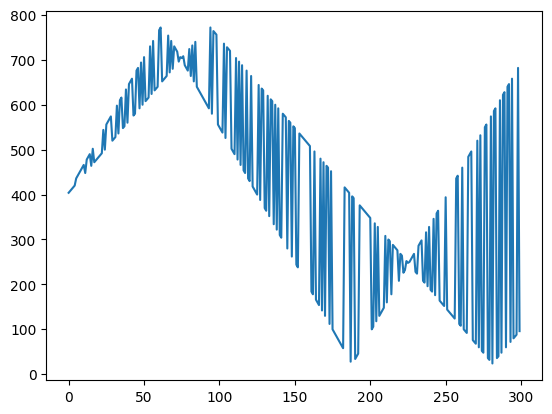

In [11]:
x = [p[0]['pos']['x'] for p in bbox_frames]
plt.plot(x)

# Maintain instance of object for every frame
i.e turn our mix of line into a single line

In [12]:
import math

class Stateful_Object:

  def __init__(self):
    self.name = ""
    self.frames = []
    self.active = True
    self.grace_periode = 30
    self.closeness_threshold = 30

  def previous_position(self):
    return self.frames[-1]

  def closeness(self, bbox):
    x1 = bbox['pos']['x']
    y1 = bbox['pos']['y']

    prev_bbox  = self.previous_position()
    x2 = prev_bbox['pos']['x']
    y2 = prev_bbox['pos']['y']

    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    return distance

  def is_same_object(self, bbox):
    return self.closeness(bbox) < self.closeness_threshold

  def add_bbox(self, bbox, time_stamp):
    return self.frames.append({**bbox, "time_stamp": time_stamp})


class Stateful_Object_Tracker:

  def __init__(self):
    self.stateful_objects = []

  def analyse_frames(self, frames):
    for i, frame in enumerate(frames):
      self.analyse_frame(frame, i)


  def analyse_frame(self, frame, time_stamp):

    for bbox in frame:

      closest_object = self.find_closest_object(bbox)

      if closest_object:
        closest_object.add_bbox(bbox, time_stamp)
      else:
        new_s_object = Stateful_Object()
        new_s_object.add_bbox(bbox, time_stamp)
        self.stateful_objects.append(new_s_object)


  def find_closest_object(self, bbox):
    # return the closest valid match
    if self.stateful_objects == []:
      return None

    ranked_objects = sorted(self.stateful_objects,
                            key=lambda obj: obj.closeness(bbox))

    if ranked_objects[0].is_same_object(bbox):
      return ranked_objects[0]

    return None





In [ ]:
stateful_objects = []

for i ,frames in enumerate(bbox_frames):
  objects_to_check = stateful_objects[:]
  # print(len(frames))
  for bbox in frames:

    object_found = False

    for s_o in objects_to_check:

      if s_o.is_same_object(bbox):
        s_o.add_bbox(bbox, i)
        objects_to_check.remove(s_o)
        object_found = True

    if object_found is not True:
      new_s_o = Stateful_Object()
      new_s_o.add_bbox(bbox, i)
      stateful_objects.append(new_s_o)

In [13]:
tracker = Stateful_Object_Tracker()
tracker.analyse_frames(bbox_frames)


308
292


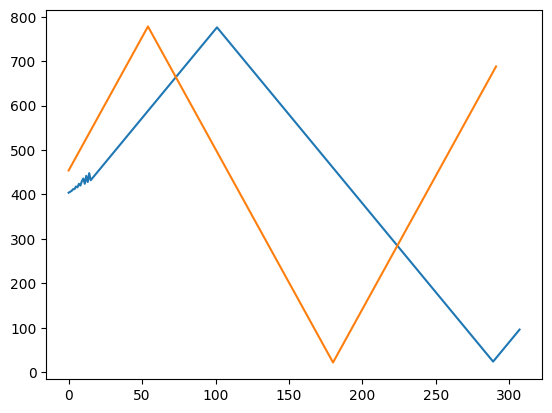

In [14]:
for s_o in tracker.stateful_objects:
  frames = s_o.frames
  print(len(frames))
  x = [p['pos']['x'] for p in frames]
  plt.plot(x)
plt.show()

In [ ]:
tracker.stateful_objects

[]

in each frame , is there a staful object that already exists that is close enough? if not, create a new object

300
300


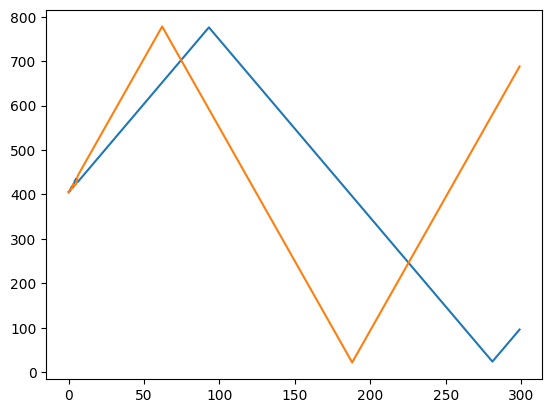

In [ ]:
for s_o in stateful_objects:
  frames = s_o.frames
  print(len(frames))
  x = [p['pos']['x'] for p in frames]
  plt.plot(x)
plt.show()